In [1]:
import requests
import boto3

import csv
import matplotlib.pyplot as plt

In [2]:
def get_currency_rates(currency):
    data = requests.get(f"https://bank.gov.ua/NBU_Exchange/exchange_site?start=20210101&end=20211231&valcode={currency}&sort=exchangedate&order=asc&json")
    return data.json()

In [3]:
# Requesting rates for currencies for 2021 year
usd_rates = get_currency_rates("usd")
eur_rates = get_currency_rates("eur")

In [4]:
print(len(usd_rates))

365


In [5]:
print(len(eur_rates))

365


In [6]:
def json_to_csv(data, filename):
    with open(filename,"w",newline="") as f:
        title = data[0].keys()
        cw = csv.DictWriter(f, title, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        cw.writeheader()
        cw.writerows(data)

In [7]:
# Converting json to csv files
json_to_csv(usd_rates, "usd_rates.csv")
json_to_csv(eur_rates, "eur_rates.csv")

In [8]:
# Uploading csv to S3
s3 = boto3.resource("s3")
bucket = s3.Bucket('s3-yesaf')

bucket.upload_file("usd_rates.csv", "usd_rates.csv")
bucket.upload_file("eur_rates.csv", "eur_rates.csv")


In [9]:
def get_date(obj):
    return obj["exchangedate"]

def get_rate(obj):
    return obj["rate"]

In [10]:
# Ploting received data

def plot_and_save(data, filename, title):
    # Dates - X
    x = list(map(get_date, usd_rates))

    # Rates - Y
    y = list(map(get_rate, usd_rates))

    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("Dates")
    plt.ylabel("Rates")
    plt.savefig(filename)
    plt.show()

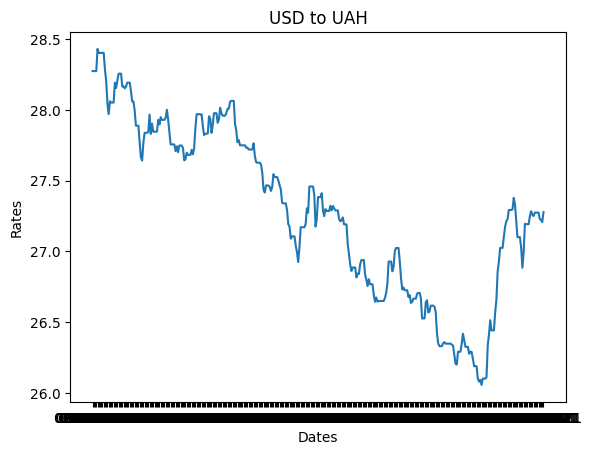

In [11]:
plot_and_save(usd_rates, "usd_rates.png", "USD to UAH")

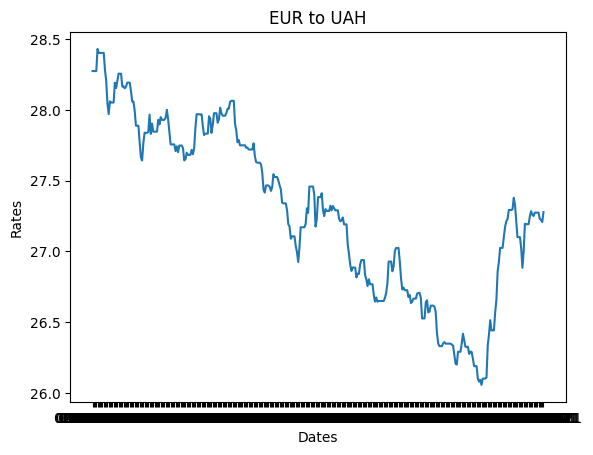

In [12]:
plot_and_save(eur_rates, "eur_rates.png", "EUR to UAH")

In [13]:
# Uploading plots to S3

bucket.upload_file("usd_rates.png", "usd_rates.png")
bucket.upload_file("eur_rates.png", "eur_rates.png")